In [68]:
import sys
print(sys.version_info)

import keras
print(keras.__version__)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json

sys.version_info(major=3, minor=7, micro=3, releaselevel='final', serial=0)
2.2.4


In [69]:
df_train = pd.read_csv('Samples/train400.csv')
df_test = pd.read_csv('Samples/test400.csv')

In [70]:
df_train.head()

,Unnamed: 0,Configuration,Phase,Inverse temperature
0,151,[[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1...,0,0.537425
1,303,[[ 1 1 1 1 1 -1 -1 -1 -1 -1 -1 -1 1 1 1...,0,0.455863
2,634,[[-1 1 -1 -1 -1 1 1 1 1 1 1 1 -1 1 1...,1,0.342629
3,669,[[ 1 1 1 1 1 -1 1 1 1 1 -1 -1 1 1 1...,1,0.333860
4,738,[[-1 1 -1 -1 -1 1 1 1 -1 -1 -1 1 1 1 1...,1,0.317824


In [71]:
df_train['Repr'] = df_train['Configuration'].apply(lambda x: np.array(json.loads(x.replace('\n',',').replace('1 ','1, '))))
df_test['Repr'] = df_test['Configuration'].apply(lambda x: np.array(json.loads(x.replace('\n',',').replace('1 ','1, '))))

0


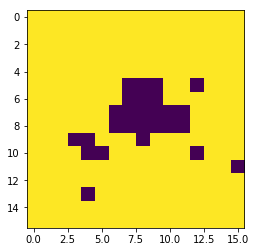

In [114]:
i = np.random.randint(0, 100)
plt.imshow(df_train['Repr'][i])
print(df_train['Phase'][i])

In [115]:
train_lattices = np.stack(df_train['Repr'])
train_labels = df_train['Phase']
test_lattices = np.stack(df_test['Repr'])
test_labels = df_test['Phase']

In [117]:
test_lattices.shape

(400, 16, 16)

In [118]:
train_lattices = train_lattices.reshape((-1, 16, 16, 1))
test_lattices = test_lattices.reshape((-1, 16, 16, 1))
input_shape = (16, 16, 1)

In [119]:
from keras import models
from keras import layers
from keras.utils import to_categorical

In [120]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [123]:
network = models.Sequential()
network.add(layers.InputLayer(input_shape))
network.add(layers.Flatten())
network.add(layers.Dense(100))
network.add(layers.Dense(2, activation='softmax'))
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [125]:
network.fit(train_lattices, train_labels, epochs=125, batch_size=128)

Epoch 1/125
400/400 [==============================] - 0s 42us/step - loss: 0.4479 - acc: 0.7750
Epoch 2/125
400/400 [==============================] - 0s 58us/step - loss: 0.4518 - acc: 0.7625
Epoch 3/125
400/400 [==============================] - 0s 75us/step - loss: 0.4402 - acc: 0.8225
Epoch 4/125
400/400 [==============================] - 0s 42us/step - loss: 0.4427 - acc: 0.7725
Epoch 5/125
400/400 [==============================] - 0s 40us/step - loss: 0.4252 - acc: 0.8250
Epoch 6/125
400/400 [==============================] - 0s 35us/step - loss: 0.4242 - acc: 0.8050
Epoch 7/125
400/400 [==============================] - 0s 32us/step - loss: 0.4304 - acc: 0.7900
Epoch 8/125
400/400 [==============================] - 0s 30us/step - loss: 0.4339 - acc: 0.7875
Epoch 9/125
400/400 [==============================] - 0s 32us/step - loss: 0.4091 - acc: 0.8300
Epoch 10/125
400/400 [==============================] - 0s 32us/step - loss: 0.4037 - acc: 0.8425
Epoch 11/125
400/400 [=======

400/400 [==============================] - 0s 27us/step - loss: 0.2314 - acc: 0.9200
Epoch 84/125
400/400 [==============================] - 0s 30us/step - loss: 0.2218 - acc: 0.9450
Epoch 85/125
400/400 [==============================] - 0s 30us/step - loss: 0.2434 - acc: 0.8800
Epoch 86/125
400/400 [==============================] - 0s 32us/step - loss: 0.2275 - acc: 0.9325
Epoch 87/125
400/400 [==============================] - 0s 97us/step - loss: 0.2221 - acc: 0.9375
Epoch 88/125
400/400 [==============================] - 0s 21us/step - loss: 0.2217 - acc: 0.9500
Epoch 89/125
400/400 [==============================] - 0s 33us/step - loss: 0.2171 - acc: 0.9425
Epoch 90/125
400/400 [==============================] - 0s 35us/step - loss: 0.2113 - acc: 0.9500
Epoch 91/125
400/400 [==============================] - 0s 37us/step - loss: 0.2159 - acc: 0.9550
Epoch 92/125
400/400 [==============================] - 0s 32us/step - loss: 0.2188 - acc: 0.9375
Epoch 93/125
400/400 [===========

In [126]:
test_loss, test_acc = network.evaluate(test_lattices, test_labels)
print('Neural network accuracy on test set:', test_acc)

400/400 [==============================] - 0s 489us/step
Neural network accuracy on test set: 0.575
